## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Monday, 4th October submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wind data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 

The referece plot is given below. 

In [49]:
import os, ssl
import matplotlib.pyplot as plt
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [50]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

## your code here

In [51]:
df_wine[0].unique()
y = df_wine[0]
X = df_wine.columns[1]


In [52]:
X = df_wine
X = X.drop(columns = (0))
X

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [53]:

from sklearn import preprocessing 
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [54]:
X_scaled = scaler.transform(X)


In [55]:
import numpy as np
cov_matrix = np.cov(X_scaled.T)
cov_matrix.shape


(13, 13)

In [56]:
from numpy import linalg as LA
eigen_vals, eigen_vecs = LA.eigh(cov_matrix)

In [57]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Create the Projection Matrix by choosing only the eigenvectors
# corresponding to the two (or in general k) largest eigenvalues
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', W)

Matrix W:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


No handles with labels found to put in legend.


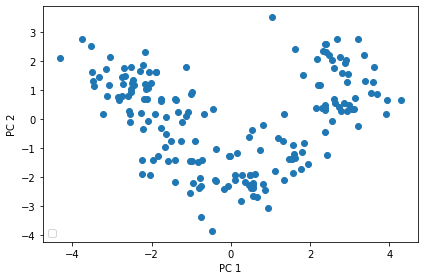

In [58]:
X_pca = X_scaled.dot(W)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']


'''plt.scatter(X_pca[:, 0], 
                X_pca[:, 1])'''

plt.scatter(X_pca[:, 0], 
                X_pca[:, 1])

'''for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y == l, 0], 
                X_pca[y == l, 1], 
                c=c, label=l, marker=m)'''

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('pca-raschka.png', dpi=300)
plt.show()

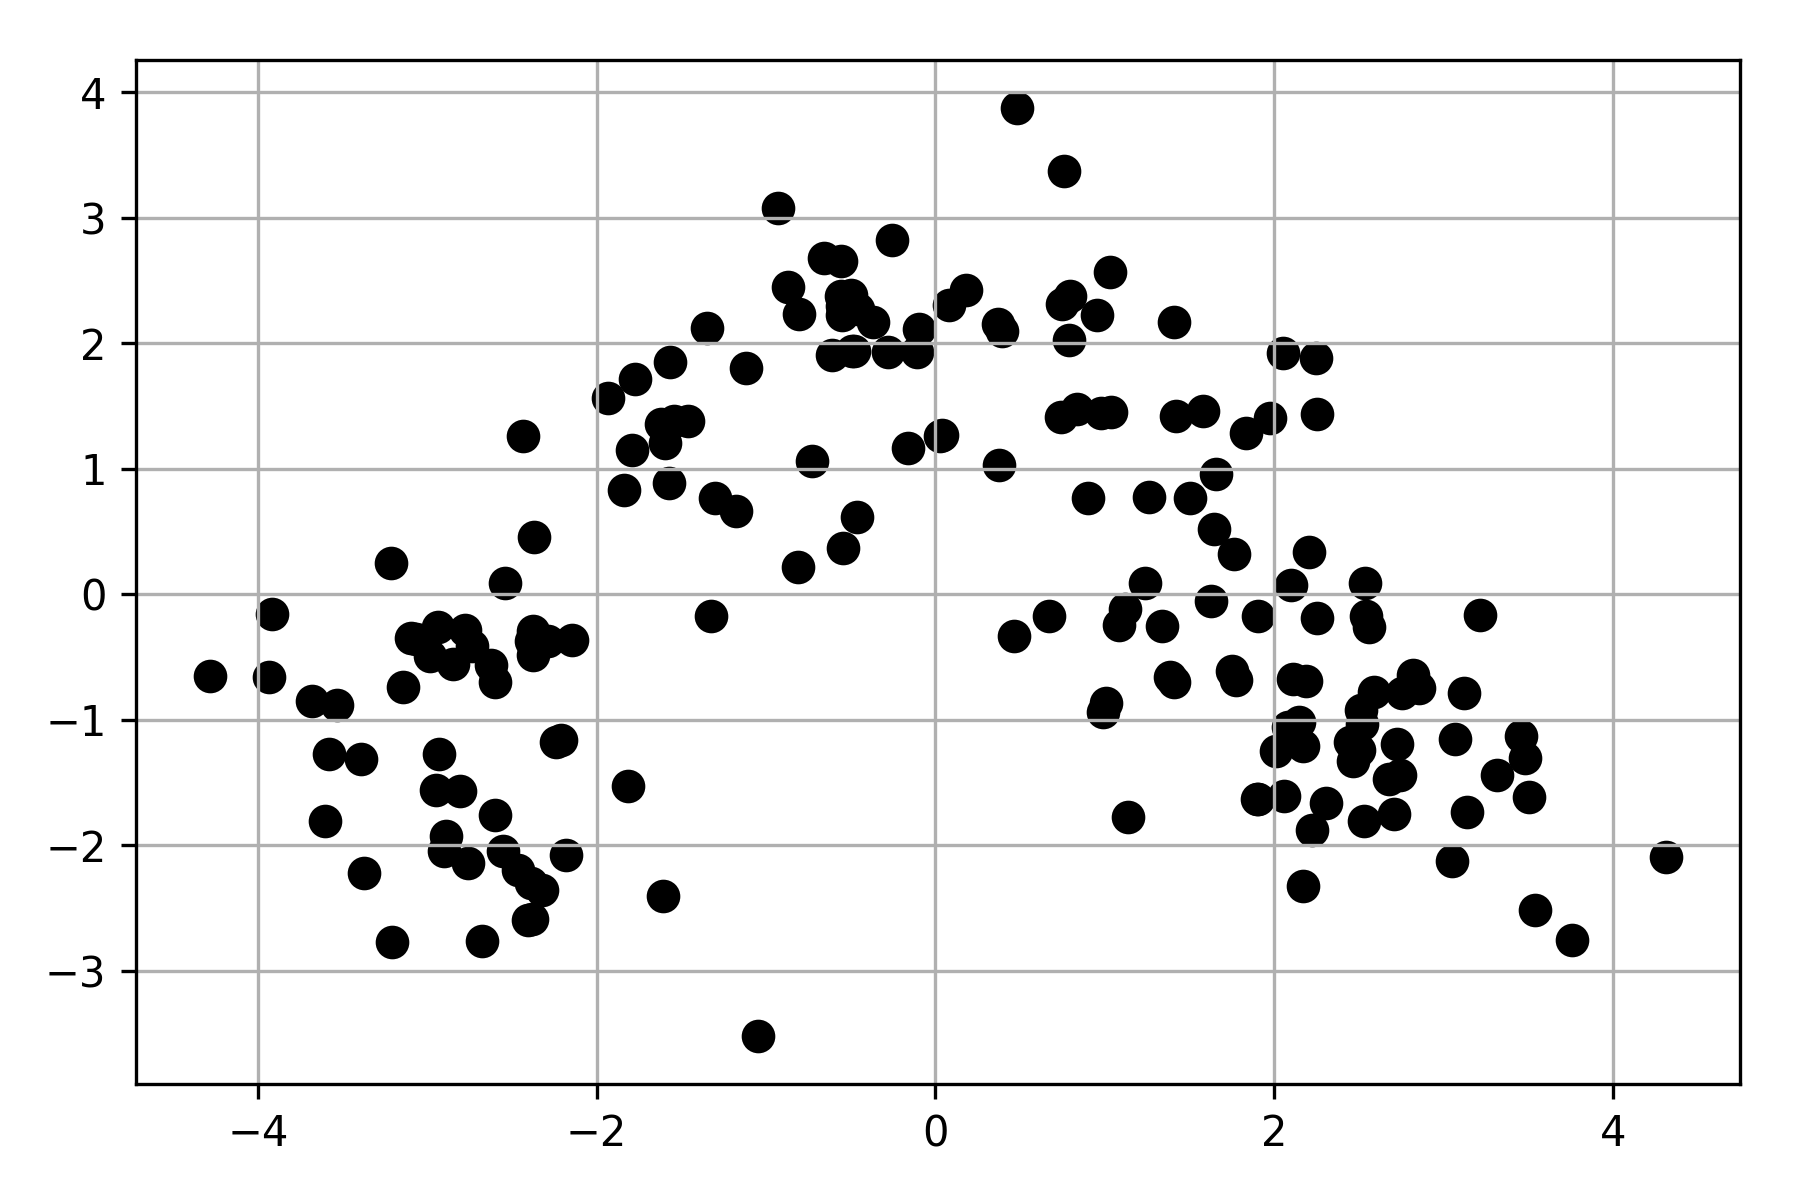

In [59]:
from IPython.display import Image
Image(filename=r'Blobs.png')

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 
Reference plot is given below: 

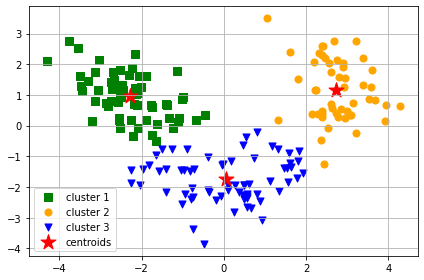

In [60]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # how many clusters
            init='random', # try 'k-means++' instead of 'random'
            n_init=10,    # 10 runs of the k-means algorithm, each run starts with a different
                          # set of 3 centroids; choose the one that has the lowest SSE
            max_iter=300, # each run is capped at 300 iterations OR
            tol=1e-04,    # tolerance of 0.0001 is reached 
            random_state=0)

y_km = km.fit_predict(X_pca)
y_km = y_km +1
plt.scatter(X_pca[y_km == 1, 0],
            X_pca[y_km == 1, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(X_pca[y_km == 2, 0],
            X_pca[y_km == 2, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X_pca[y_km == 3, 0],
            X_pca[y_km == 3, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('centroids.png', dpi=300)
plt.show()

In [61]:
## fixing the labels

y_km[y_km == 3] =4
y_km
y_km[y_km == 2] =3
y_km
y_km[y_km == 4] =2
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [62]:
accuracy = np.sum(y_km ==y)/ (np.sum(y_km ==y) + np.sum(y_km !=y))
print("Prediction Accuracy : ")

accuracy



Prediction Accuracy : 


0.9662921348314607

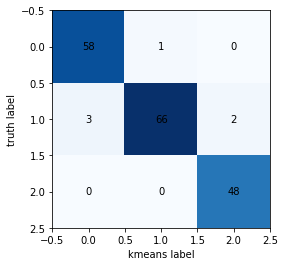

In [63]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_km)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

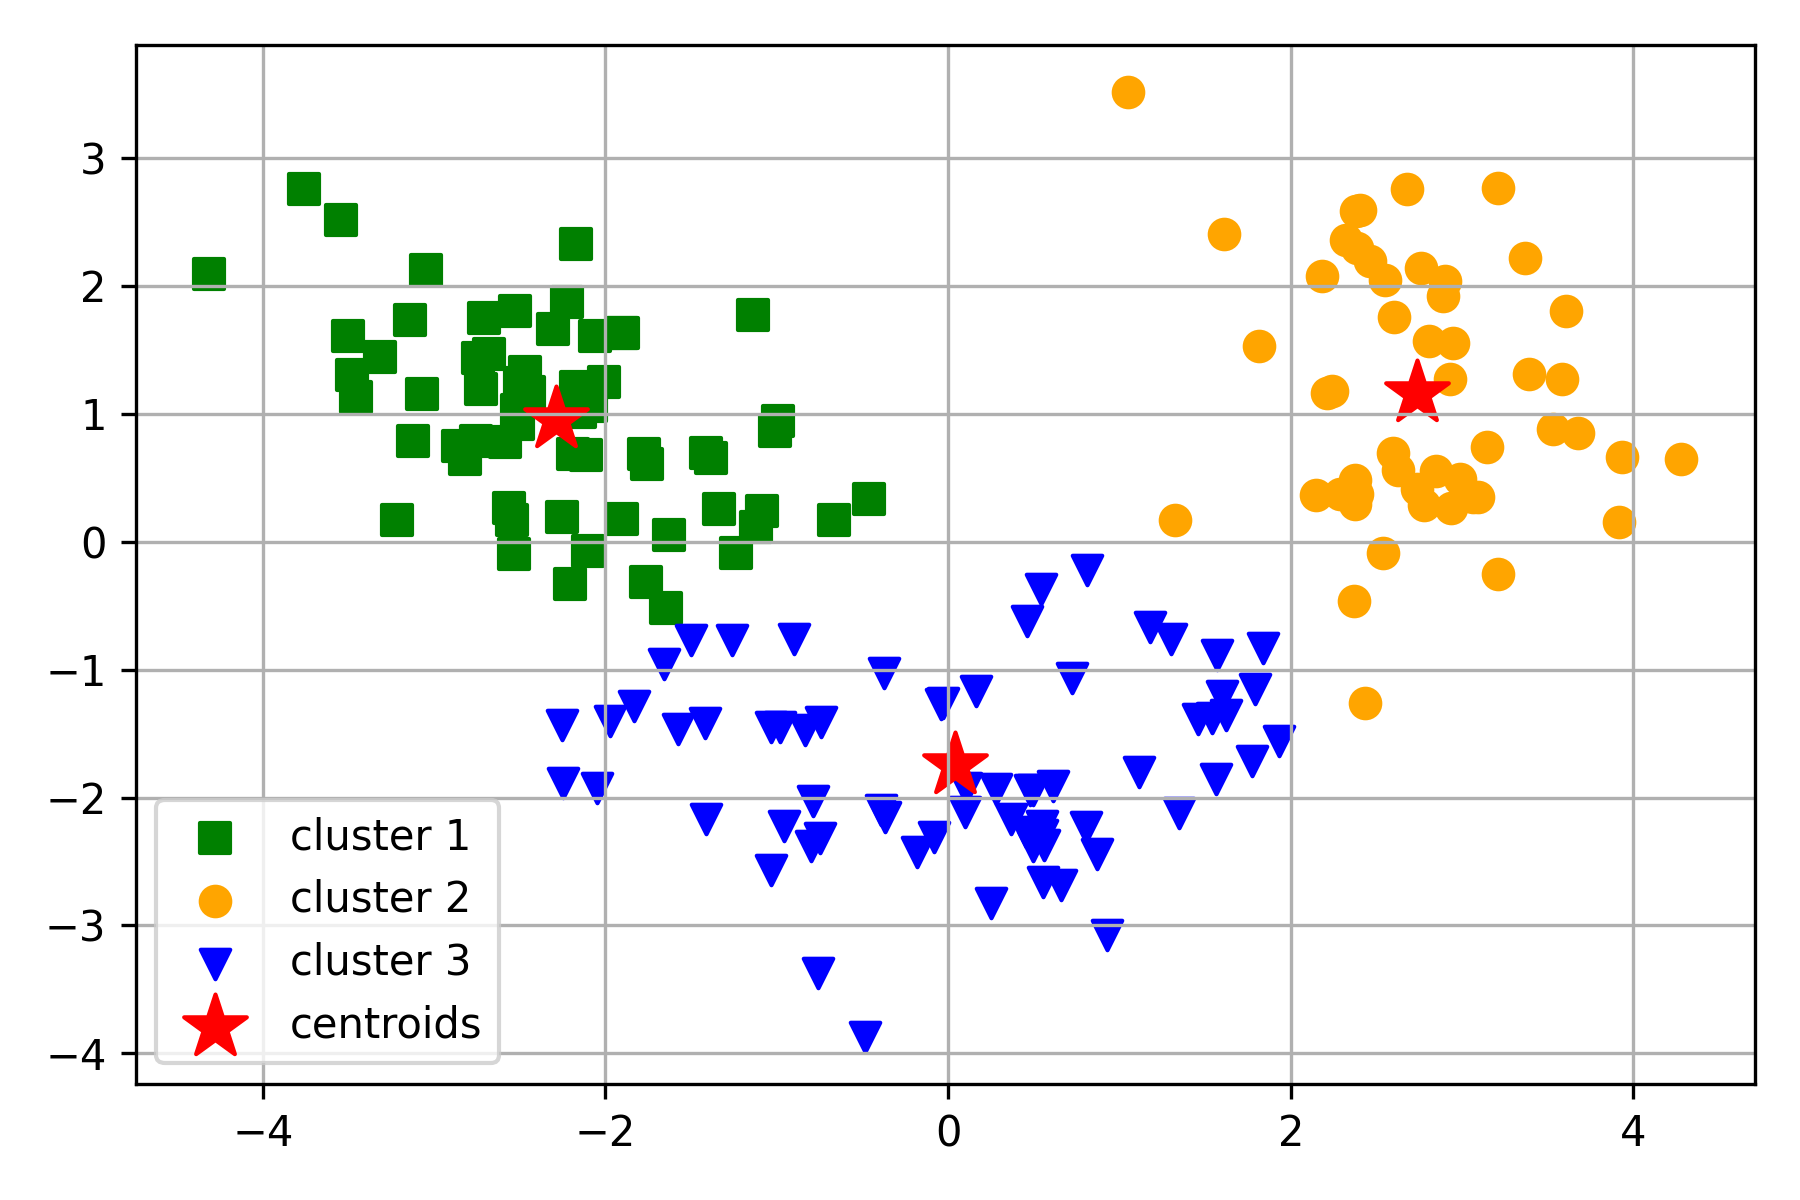

In [64]:
Image(filename=r'centroids.png')

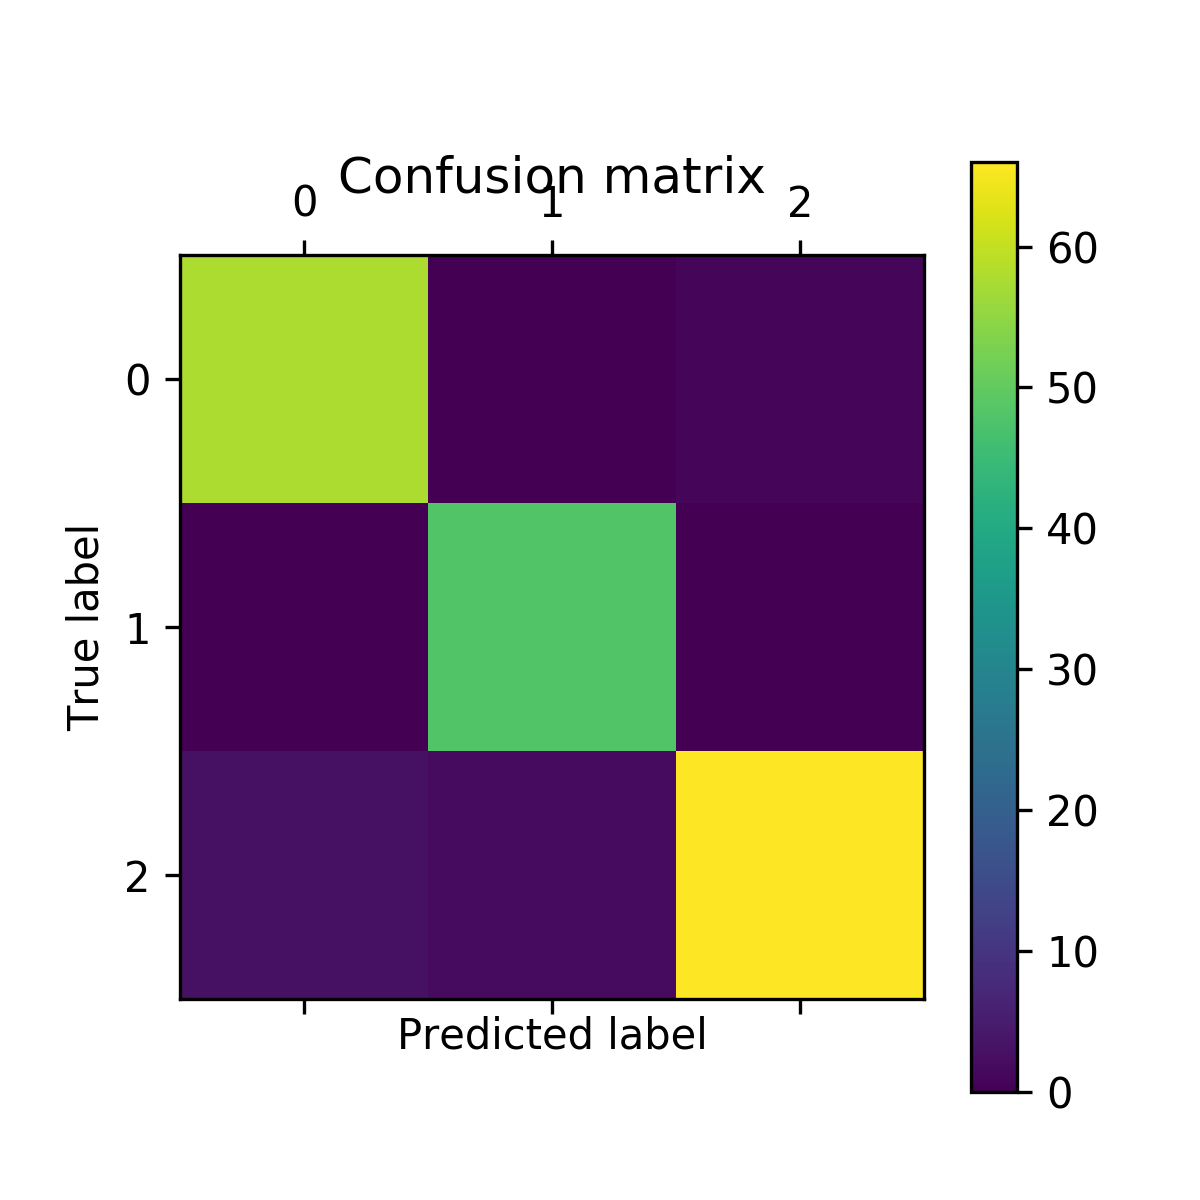

In [65]:
Image(filename=r'confusion.png')

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

In [66]:
Image(filename=r'elbow.png')

print('Distortion: %.2f' % km.inertia_)


Distortion: 260.02


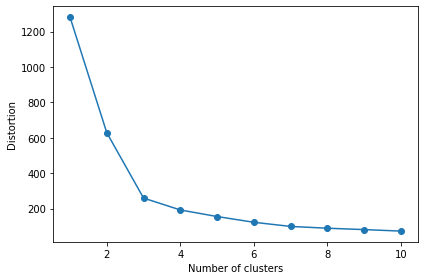

In [67]:


distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_pca)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('elbow.png', dpi=300)
plt.show()